In [1]:
import pandas as pd
import seaborn as sns
import os
from glob import glob
import matplotlib.pyplot as plt

In [7]:
MINIMALIST = "minimalist"
FULL = "full_fledged"

this notebook assumes that you already have merged definitions

In [15]:
def no_merging(original, strategies, datasets, number_of_senses_per_word, language):
    corpus_df_original = pd.DataFrame()
    for i, corpus in enumerate(glob(original)):
        corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
        corpus_df_original = pd.concat((corpus_df_original, corpus_df))
    strategies.extend(["no_merging" for _ in range(len(corpus_df_original[0].unique()))])
    datasets.extend([language[0].upper()+language[1:] for _  in range(len(corpus_df_original[0].unique()))])
    for word in corpus_df_original[0].unique():
        this_word = corpus_df_original[corpus_df_original[0]==word]
        number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
    print(len(number_of_senses_per_word))
    print(len(strategies))
    return strategies, datasets, number_of_senses_per_word

In [17]:
def run_language(language, merged_path, strategies, datasets, number_of_senses_per_word):
    print(language)
    english = os.path.join(merged_path, language)
    original = f"../../generated_definitions/{language}/greedy/*.tsv.gz"
    strategies, datasets, number_of_senses_per_word = no_merging(
        original, strategies, datasets, number_of_senses_per_word, language,
    )
    for strategy in (MINIMALIST, FULL):
        strategy_path = os.path.join(english, strategy)
        if language == "english":
            gen_strategy_path = os.path.join(strategy_path, "greedy50")
        else:
            gen_strategy_path = os.path.join(strategy_path, "greedy10")
        corpus_df_original = pd.DataFrame()
        for corpus in glob(gen_strategy_path + "/*.tsv.gz"):
            corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
            corpus_df_original = pd.concat((corpus_df_original, corpus_df))
        strategies.extend([strategy for _ in range(len(corpus_df_original[0].unique()))])
        datasets.extend([language[0].upper()+language[1:] for _  in range(len(corpus_df_original[0].unique()))])
        for word in corpus_df_original[0].unique():
            this_word = corpus_df_original[corpus_df_original[0]==word]
            number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
    return strategies, datasets, number_of_senses_per_word

english
37
37
222
222
333
333
444
444
norwegian1
484
484
norwegian2
604
604
684
   Average number of senses per 100 usage examples     Merging  Dataset
0                                        88.996764  no_merging  English
1                                        63.448276  no_merging  English
2                                        30.606860  no_merging  English
3                                        64.499170  no_merging  English
4                                        64.279297  no_merging  English
saving to graph.pdf


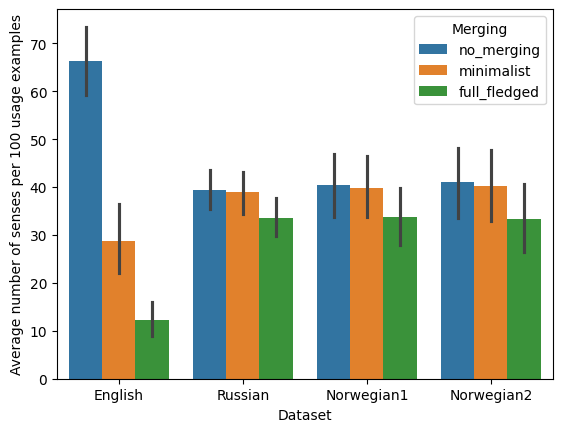

In [18]:
merged_path = "../../generated_definitions/merged"
number_of_senses_per_word = []
strategies = []
datasets = []
language = "english"
strategies, datasets, number_of_senses_per_word = run_language(
    language, merged_path, strategies, datasets, number_of_senses_per_word,
)

original = f"../../generated_definitions/russian/greedy/*.tsv.gz"
language = 'russian'
strategies, datasets, number_of_senses_per_word = no_merging(
    original, strategies, datasets, number_of_senses_per_word, language,
)
for strategy in (MINIMALIST, FULL):
    corpus_df_original = pd.DataFrame()
    paths = (
        f"../../generated_definitions/merged/russian1/{strategy}/greedy10/russian-corpus1.tsv.gz",
        f"../../generated_definitions/merged/russian1/{strategy}/greedy10/russian-corpus2.tsv.gz",
        f"../../generated_definitions/merged/russian3/{strategy}/greedy10/russian-corpus3.tsv.gz",
    )
    for corpus in paths:
        corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
        corpus_df_original = pd.concat((corpus_df_original, corpus_df))
    strategies.extend([strategy for _ in range(len(corpus_df_original[0].unique()))])
    datasets.extend([language[0].upper()+language[1:] for _  in range(len(corpus_df_original[0].unique()))])
    for word in corpus_df_original[0].unique():
        this_word = corpus_df_original[corpus_df_original[0]==word]
        number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
    print(len(number_of_senses_per_word))
    print(len(strategies))
    
for language in ("norwegian1", "norwegian2"):
    strategies, datasets, number_of_senses_per_word = run_language(
        language, merged_path, strategies, datasets, number_of_senses_per_word,
)
    
print(len(datasets))
data = pd.DataFrame(
    {
        f'Average number of senses per 100 usage examples':number_of_senses_per_word,
        "Merging": strategies, "Dataset": datasets},
             )
print(data.head())
g = sns.barplot(
    data=data,
    hue="Merging",
    x="Dataset",
    y='Average number of senses per 100 usage examples' 
                )
        #plt.show()
out = "graph.pdf"
print(f"saving to {out}")
plt.savefig(out, bbox_inches='tight')